# Laboratorio 6 Grupal "Aprendizaje por Refuerzo".
#### Nombres:
####          - Piza Nava Vladimir.
####          - Aramayo Valdez Joaquin.
####          - Viza Hoyos Maria Belen.
####          - Mendoza Ovando Carlos Saul.
####          - Solorzano Diego.
#### Link GitHub: https://github.com/Joaco15045F/InteligenciaArtificial/blob/main/Laboratorio6%20grupal%20AxR/Lab6_BipedalWalker.ipynb
#### Link info BipedalWalker: https://www.gymlibrary.dev/environments/box2d/bipedal_walker/

##### En este proyecto se desarrollará un agente capaz de aprender a caminar en un entorno de Bipedal Walker utilizando el algoritmo de Q-Learning. A través de la interacción con el entorno, el agente irá ajustando su comportamiento mediante la actualización de su tabla Q, que representa las recompensas esperadas por cada acción en cada estado. El objetivo es entrenar al agente para que logre caminar de manera eficiente, maximizando su recompensa acumulada mediante una política de explotación, es decir, eligiendo las mejores acciones basadas en lo aprendido.


### Importación de librerías
#### Se importan las librerías necesarias para trabajar con operaciones numéricas (NumPy), entornos de aprendizaje por refuerzo (gymnasium), visualización de gráficos (matplotlib.pyplot) y diccionarios con valores predeterminados (defaultdict).



In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import defaultdict

### Inicialización del entorno
#### Se crea e inicializa el entorno de simulación "BipedalWalker-v3" utilizando la librería gymnasium, que simula un robot bípedo en un escenario de caminata.

In [2]:
# Inicializar el entorno
env = gym.make("BipedalWalker-v3")

### Parámetros de Q-learning
#### Se configuran los parámetros principales del algoritmo de Q-learning: alpha (tasa de aprendizaje) que ajusta la rapidez con la que se aprende de nuevas experiencias, gamma (factor de descuento) que controla la importancia de las recompensas futuras, epsilon (tasa de exploración) que determina la probabilidad de explorar acciones nuevas, y n_bins (número de divisiones) para discretizar las observaciones del entorno.

In [3]:
# Parámetros de Q-learning
alpha = 0.1       # Tasa de aprendizaje
gamma = 0.99      # Factor de descuento
epsilon = 0.1     # Tasa de exploración
n_bins = 5        # Número de divisiones para discretización en cada dimensión

### Discretización del espacio de observación
#### La función discretize_obs convierte las observaciones continuas del entorno en un formato discreto. Para ello, crea intervalos (bins) en cada dimensión del espacio de observación utilizando n_bins divisiones. Luego, asigna a cada observación el índice correspondiente dentro de su intervalo mediante np.digitize, facilitando la representación de las observaciones de manera discreta que puede ser utilizada por el algoritmo de Q-learning.

In [4]:
# Discretizar el espacio de observación
def discretize_obs(obs):
    bins = [np.linspace(-5, 5, n_bins) for _ in range(len(obs))]
    discretized = tuple(np.digitize(o, bins[i]) for i, o in enumerate(obs))
    return discretized

### Creación de conjunto de acciones discretizadas y inicialización de la Q-table
#### En este bloque se define el número de dimensiones del espacio de acciones (action_space_dim) del entorno. Luego, se crea action_bins, que divide el rango de posibles acciones de -1 a 1 en intervalos discretos, usando n_bins divisiones para cada dimensión. Finalmente, se inicializa la Q-table como un diccionario donde cada estado tiene un conjunto de acciones posibles, inicialmente todas con valor cero. Esto permitirá al algoritmo almacenar y actualizar las recompensas asociadas a cada acción en cada estado.

In [ ]:
# Crear un conjunto de acciones discretizadas para cada dimensión del espacio de acción
action_space_dim = env.action_space.shape[0]
action_bins = np.linspace(-1, 1, n_bins)  # Rango de acción para cada articulación

# Inicializar Q-table como un diccionario
q_table = defaultdict(lambda: np.zeros((n_bins,) * action_space_dim))

### Definición de la política de acción (ε-greedy)
#### La función choose_action implementa la política ε-greedy para seleccionar acciones. Primero, discretiza el estado actual usando la función discretize_obs para convertirlo en una clave que puede ser utilizada en la Q-table. Si el agente está en modo de entrenamiento y se cumple una probabilidad definida por epsilon, selecciona una acción aleatoria en cada dimensión del espacio de acción. Si no, elige la mejor acción disponible en cada dimensión, buscando la acción con el valor más alto en la Q-table para el estado dado.

In [6]:
# Definir la política de acción (ε-greedy)
def choose_action(state, training=True):
    # Discretizar el estado para usarlo como clave
    state = discretize_obs(state)

    if training and np.random.rand() < epsilon:
        # Acción aleatoria en cada dimensión
        return np.random.choice(action_bins, size=action_space_dim)
    else:
        # Seleccionar la mejor acción para cada dimensión
        best_action_idx = np.unravel_index(np.argmax(q_table[state]), (n_bins,) * action_space_dim)
        return np.array([action_bins[i] for i in best_action_idx])

### Entrenamiento del agente con Q-learning
#### Este bloque entrena al agente utilizando Q-learning. En cada episodio, el agente selecciona acciones según la política ε-greedy, actualiza la Q-table usando la ecuación de Q-learning y acumula las recompensas obtenidas. Al final de cada episodio, se guarda la recompensa total, y cada 100 episodios se imprime el progreso. Finalmente, se grafica la recompensa promedio para mostrar el aprendizaje del agente a lo largo del tiempo.

Episodio 0, Recompensa total: -106.65746367270127
Episodio 100, Recompensa total: -100.70155690841253
Episodio 200, Recompensa total: -132.17910480513422
Episodio 300, Recompensa total: -121.74853059161826
Episodio 400, Recompensa total: -127.38044910318591
Episodio 500, Recompensa total: -121.64355758916216
Episodio 600, Recompensa total: -102.7134151282354
Episodio 700, Recompensa total: -127.46389534347007
Episodio 800, Recompensa total: -104.45336570256514
Episodio 900, Recompensa total: -101.72573793094915
Episodio 1000, Recompensa total: -71.11057206868854
Episodio 1100, Recompensa total: -105.05328476859691
Episodio 1200, Recompensa total: -48.8864116502744
Episodio 1300, Recompensa total: -58.69774413249269
Episodio 1400, Recompensa total: -104.44705852873747
Episodio 1500, Recompensa total: -102.90411899704549
Episodio 1600, Recompensa total: -122.81210711845321
Episodio 1700, Recompensa total: -100.83693448058143
Episodio 1800, Recompensa total: -118.29568583349202
Episodio 1

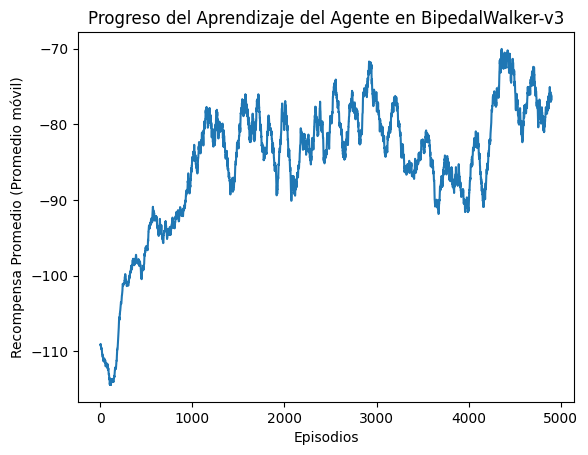

In [7]:
# Entrenar el agente con Q-learning
rewards_per_episode = []

for episode in range(5000):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = choose_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Discretizar el estado y la acción
        state_discrete = discretize_obs(state)
        next_state_discrete = discretize_obs(next_state)
        action_idx = tuple(np.digitize(a, action_bins) - 1 for a in action)

        # Actualizar Q-table usando la ecuación de Q-learning
        if not done:
            next_action_idx = np.unravel_index(np.argmax(q_table[next_state_discrete]), (n_bins,) * action_space_dim)
            best_next_q_value = q_table[next_state_discrete][next_action_idx]
            td_target = reward + gamma * best_next_q_value
        else:
            td_target = reward

        td_error = td_target - q_table[state_discrete][action_idx]
        q_table[state_discrete][action_idx] += alpha * td_error

        # Acumular la recompensa
        total_reward += reward
        state = next_state

    # Guardar la recompensa total del episodio
    rewards_per_episode.append(total_reward)

    # Mostrar progreso
    if episode % 100 == 0:
        print(f"Episodio {episode}, Recompensa total: {total_reward}")

# Graficar las recompensas por episodio
window_size = 100
smoothed_rewards = np.convolve(rewards_per_episode, np.ones(window_size) / window_size, mode='valid')
plt.plot(smoothed_rewards)
plt.xlabel('Episodios')
plt.ylabel('Recompensa Promedio (Promedio móvil)')
plt.title('Progreso del Aprendizaje del Agente en BipedalWalker-v3')
plt.show()

### Muestra de la Tabla Q
#### En esta sección, se presenta una muestra de los primeros estados y sus valores Q correspondientes. La tabla Q almacena los valores de recompensa esperada para cada acción en un estado específico. Cada entrada en la tabla representa un estado del entorno y un conjunto de valores Q para las acciones posibles que el agente puede tomar. Estos valores indican cuán beneficiosa es una acción en un estado dado, lo que guía las decisiones del agente.

In [8]:
# Mostrar una parte de la Tabla Q
print("\n--- Muestra de la Tabla Q ---")
sample_states = list(q_table.keys())[:5]  # Muestra de los primeros 5 estados
for state in sample_states:
    print(f"Estado {state}: Q-valores {q_table[state]}")


--- Muestra de la Tabla Q ---
Estado (np.int64(3), np.int64(3), np.int64(2), np.int64(2), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(2), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3)): Q-valores [[[[-0.02984098 -0.02879658 -0.02498596 -0.01928259 -0.0393636 ]
   [-0.02434444 -0.0229398  -0.04259572 -0.01788788 -0.01927372]
   [-0.0188423  -0.01742813 -0.01634324 -0.01765743 -0.01908507]
   [-0.01620402 -0.01477463 -0.01333555 -0.01555151 -0.01630575]
   [-0.02094907 -0.01951738 -0.01413038 -0.01838729 -0.01354531]]

  [[-0.02882028 -0.02770229 -0.02354373 -0.01789195 -0.01935721]
   [-0.02330849 -0.02187082 -0.02108404 -0.01642802 -0.01785878]
   [-0.01779291 -0.01638889 -0.01520883 -0.01626344 -0.01774797]
   [-0.01505276 -0.01363455 -0.01221697 -0.01426391 -0.01490359]
   [-0.01876169 -0.01736804 -0.01288039 -0.01640056

In [9]:
import numpy as np
import pandas as pd

# Muestra de la Tabla Q mejorada con pandas
sample_states = list(q_table.keys())[:5]  # Muestra de los primeros 5 estados

# Crear una lista para almacenar los datos
data = []

# Redondear valores usando numpy
for state in sample_states:
    q_values = q_table[state]
    q_values_rounded = np.round(q_values, 3)  # Redondear todo el arreglo a 3 decimales
    data.append({'Estado': state, 'Q-valores': q_values_rounded.tolist()})  # Convertir a lista para mejor visualización

# Crear DataFrame
df = pd.DataFrame(data)


In [10]:
df

,Estado,Q-valores
0,"(3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, ...","[[[[-0.03, -0.029, -0.025, -0.019, -0.039], [-..."
1,"(3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, ...","[[[[-0.041, -0.039, -0.032, -0.03, -0.032], [-..."
2,"(3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, ...","[[[[-0.04, -0.065, -0.032, -0.033, -0.064], [-..."
3,"(3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, ...","[[[[-0.039, -0.037, -0.034, -0.027, -0.027], [..."
4,"(3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, ...","[[[[-0.038, -0.033, -0.067, -0.032, 0.018], [-..."


In [11]:
num_estados = len(q_table)
print(f"Número de estados en la Q-table: {num_estados}")


Número de estados en la Q-table: 3789


### Prueba del Agente en Modo Explotación
#### En este bloque de código, se realiza una prueba del agente en modo explotación, donde el agente toma decisiones basadas únicamente en su tabla Q, sin explorar acciones aleatorias. En cada episodio, el agente elige la acción con la mayor recompensa esperada en el estado actual. El ciclo se repite hasta que el episodio termine, acumulando la recompensa total. Al final, se imprime la recompensa obtenida por episodio y el promedio general de las recompensas en todas las pruebas, lo que permite evaluar el desempeño del agente en el entorno.

In [14]:
# Prueba del agente en modo explotación (sin exploración)
def test_agent(num_episodes=10):
    epsilon = 0  # Desactivar exploración
    total_rewards = []
    
    # Crear el entorno con render_mode="human" solo para la fase de prueba
    env = gym.make("BipedalWalker-v3", render_mode="human")
    
    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = choose_action(state, training=False)
            next_state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            state = next_state
            done = terminated or truncated
            env.render()  # Mostrar el render del entorno en cada paso (solo en explotación)
        total_rewards.append(total_reward)
        print(f"Recompensa total en episodio de prueba {episode + 1}: {total_reward}")
    print(f"\nRecompensa promedio en modo explotación: {np.mean(total_rewards)}")

# Ejecutar la prueba del agente
test_agent()


Recompensa total en episodio de prueba 1: -33.22785689188331
Recompensa total en episodio de prueba 2: -29.910236583482774
Recompensa total en episodio de prueba 3: -104.04137867031184
Recompensa total en episodio de prueba 4: -27.077989504116577
Recompensa total en episodio de prueba 5: -117.1740999070791
Recompensa total en episodio de prueba 6: -135.90490295438656
Recompensa total en episodio de prueba 7: -30.5353246113536
Recompensa total en episodio de prueba 8: -31.61658551585078
Recompensa total en episodio de prueba 9: -30.14341295830252
Recompensa total en episodio de prueba 10: -104.32991503819638

Recompensa promedio en modo explotación: -64.39617026349634


In [13]:
env.close()